In [1]:
import pandas as pd

In [2]:
csv_path = "Houses Dataset/HousesInfo.txt"
cols = ["bedrooms","bathrooms", "area", "zipcode", "price"]
df = pd.read_csv(csv_path, sep=" ", header=None, names=cols)

In [3]:
len(df)

535

In [4]:
df.head()

,bedrooms,bathrooms,area,zipcode,price
0,4,4.0,4053,85255,869500
1,4,3.0,3343,36372,865200
2,3,4.0,3923,85266,889000
3,5,5.0,4022,85262,910000
4,3,4.0,4116,85266,971226


In [5]:
X = df.drop(['zipcode', 'price'], axis = 1)
y = df['price']

In [6]:
X.head()

,bedrooms,bathrooms,area
0,4,4.0,4053
1,4,3.0,3343
2,3,4.0,3923
3,5,5.0,4022
4,3,4.0,4116


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

In [21]:
len(X_train), len(X_test)

(374, 161)

In [22]:
# from sklearn.preprocessing import LabelBinarizer, MinMaxScaler
# cs = MinMaxScaler()
# X_train = cs.fit_transform(X_train)
# X_test = cs.fit_transform(X_test)

mean = X_train.mean(axis=0)
X_train -= mean
std = X_train.std(axis=0)
X_train /= std

X_test -= mean
X_test /= std

In [23]:
X_train

,bedrooms,bathrooms,area
202,-0.334692,0.316120,-0.055293
200,-1.180467,-1.152562,-1.051053
152,-1.180467,-0.663001,-1.051053
82,-1.180467,-1.642123,-0.953385
88,0.511084,-0.173441,0.142332
...,...,...,...
456,2.202635,2.274363,1.263993
360,-1.180467,-1.642123,-1.124304
439,-0.334692,-0.663001,-0.977802
174,-1.180467,-1.642123,-1.044186


In [24]:
y_train

202    988000
200    739000
152     22000
82     397500
88     619000
        ...  
456    859000
360     63500
439    425000
174    629000
122    799000
Name: price, Length: 374, dtype: int64

In [25]:
maxPrice = df["price"].max()
y_train = y_train / maxPrice
y_test = y_test / maxPrice

print(maxPrice)

5858000


In [26]:
y_train

202    0.168658
200    0.126152
152    0.003756
82     0.067856
88     0.105667
         ...   
456    0.146637
360    0.010840
439    0.072550
174    0.107375
122    0.136395
Name: price, Length: 374, dtype: float64

In [27]:
dim = X_train.shape[1]

In [52]:
from keras.models import Sequential
from keras.layers import Dense

#define our MLP network
model = Sequential()
model.add(Dense(8, input_dim=dim, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1))

In [53]:
model.compile(loss="mean_absolute_percentage_error", optimizer='adam', metrics=['mae'])

In [54]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 8)                 32        
                                                                 
 dense_13 (Dense)            (None, 4)                 36        
                                                                 
 dense_14 (Dense)            (None, 1)                 5         
                                                                 
Total params: 73 (292.00 Byte)
Trainable params: 73 (292.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [55]:
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=200,
    batch_size=4,
    verbose=1)

Epoch 1/200
94/94 [==============================] - 1s 2ms/step - loss: 106.0301 - mae: 0.0974 - val_loss: 80.8322 - val_mae: 0.0726
Epoch 2/200
94/94 [==============================] - 0s 1ms/step - loss: 76.5017 - mae: 0.0837 - val_loss: 72.8600 - val_mae: 0.0654
Epoch 3/200
94/94 [==============================] - 0s 1ms/step - loss: 70.7060 - mae: 0.0798 - val_loss: 69.0155 - val_mae: 0.0639
Epoch 4/200
94/94 [==============================] - 0s 1ms/step - loss: 66.8223 - mae: 0.0773 - val_loss: 62.4647 - val_mae: 0.0596
Epoch 5/200
94/94 [==============================] - 0s 1ms/step - loss: 66.4022 - mae: 0.0766 - val_loss: 62.7004 - val_mae: 0.0559
Epoch 6/200
94/94 [==============================] - 0s 1ms/step - loss: 63.4518 - mae: 0.0718 - val_loss: 62.4072 - val_mae: 0.0534
Epoch 7/200
94/94 [==============================] - 0s 1ms/step - loss: 61.4689 - mae: 0.0698 - val_loss: 52.5269 - val_mae: 0.0508
Epoch 8/200
94/94 [==============================] - 0s 1ms/step - l

94/94 [==============================] - 0s 1ms/step - loss: 40.8860 - mae: 0.0491 - val_loss: 42.9401 - val_mae: 0.0343
Epoch 63/200
94/94 [==============================] - 0s 1ms/step - loss: 41.8455 - mae: 0.0498 - val_loss: 43.2046 - val_mae: 0.0363
Epoch 64/200
94/94 [==============================] - 0s 1ms/step - loss: 41.7183 - mae: 0.0492 - val_loss: 41.9954 - val_mae: 0.0348
Epoch 65/200
94/94 [==============================] - 0s 1ms/step - loss: 42.2915 - mae: 0.0496 - val_loss: 42.6265 - val_mae: 0.0346
Epoch 66/200
94/94 [==============================] - 0s 1ms/step - loss: 41.1244 - mae: 0.0494 - val_loss: 44.6760 - val_mae: 0.0340
Epoch 67/200
94/94 [==============================] - 0s 1ms/step - loss: 39.3978 - mae: 0.0489 - val_loss: 59.9423 - val_mae: 0.0413
Epoch 68/200
94/94 [==============================] - 0s 1ms/step - loss: 41.6683 - mae: 0.0493 - val_loss: 46.9059 - val_mae: 0.0375
Epoch 69/200
94/94 [==============================] - 0s 1ms/step - loss: 4

94/94 [==============================] - 0s 1ms/step - loss: 39.7700 - mae: 0.0483 - val_loss: 51.3074 - val_mae: 0.0372
Epoch 124/200
94/94 [==============================] - 0s 1ms/step - loss: 39.7000 - mae: 0.0477 - val_loss: 44.7378 - val_mae: 0.0336
Epoch 125/200
94/94 [==============================] - 0s 1ms/step - loss: 39.6552 - mae: 0.0485 - val_loss: 48.5856 - val_mae: 0.0354
Epoch 126/200
94/94 [==============================] - 0s 1ms/step - loss: 41.6623 - mae: 0.0483 - val_loss: 44.2739 - val_mae: 0.0349
Epoch 127/200
94/94 [==============================] - 0s 1ms/step - loss: 40.4618 - mae: 0.0484 - val_loss: 47.6086 - val_mae: 0.0328
Epoch 128/200
94/94 [==============================] - 0s 1ms/step - loss: 43.5633 - mae: 0.0480 - val_loss: 44.4967 - val_mae: 0.0343
Epoch 129/200
94/94 [==============================] - 0s 1ms/step - loss: 42.9770 - mae: 0.0490 - val_loss: 47.5067 - val_mae: 0.0344
Epoch 130/200
94/94 [==============================] - 0s 1ms/step - 

Epoch 184/200
94/94 [==============================] - 0s 1ms/step - loss: 40.2436 - mae: 0.0480 - val_loss: 45.9860 - val_mae: 0.0346
Epoch 185/200
94/94 [==============================] - 0s 1ms/step - loss: 39.3700 - mae: 0.0485 - val_loss: 47.4986 - val_mae: 0.0338
Epoch 186/200
94/94 [==============================] - 0s 1ms/step - loss: 40.6111 - mae: 0.0473 - val_loss: 50.6182 - val_mae: 0.0364
Epoch 187/200
94/94 [==============================] - 0s 1ms/step - loss: 39.5667 - mae: 0.0480 - val_loss: 47.1749 - val_mae: 0.0341
Epoch 188/200
94/94 [==============================] - 0s 1ms/step - loss: 39.8908 - mae: 0.0480 - val_loss: 48.3031 - val_mae: 0.0345
Epoch 189/200
94/94 [==============================] - 0s 1ms/step - loss: 37.9810 - mae: 0.0476 - val_loss: 53.8077 - val_mae: 0.0376
Epoch 190/200
94/94 [==============================] - 0s 1ms/step - loss: 39.5594 - mae: 0.0477 - val_loss: 46.6325 - val_mae: 0.0346
Epoch 191/200
94/94 [==============================] - 

In [56]:
# history.history

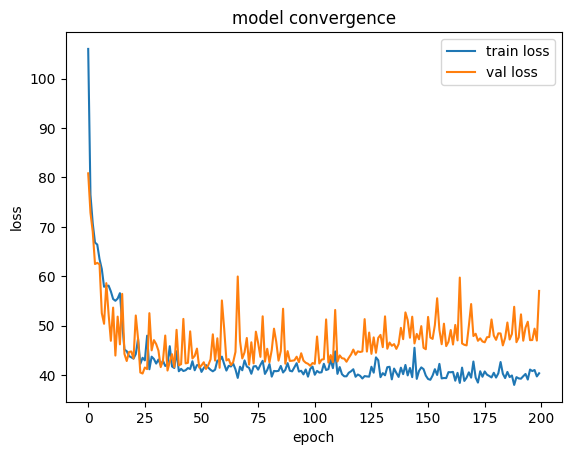

In [57]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model convergence')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'val loss'])
plt.show()

In [58]:
import numpy as np
import locale

In [59]:
print("[INFO] predicting house prices...")
preds = model.predict(X_test)

diff = preds.flatten() - y_test
percentDiff = (diff / y_test) * 100
absPercentDiff = np.abs(percentDiff)

mean = np.mean(absPercentDiff)
std = np.std(absPercentDiff)

print("[INFO] mean error: {:.2f}%, std: {:.2f}%".format(mean, std))

[INFO] predicting house prices...
6/6 [==============================] - 0s 0s/step
[INFO] mean error: 57.02%, std: 65.72%


In [75]:
data = []
head = ["GT", "Pred", "Diff"]

for gt, pred in zip(y_test, preds[:10]):
    data.append([gt, pred[0], gt-pred[0]])

In [76]:
# !pip install tabulate
from tabulate import tabulate

In [54]:
print(tabulate(data, headers=head, tablefmt='grid'))

+---------+----------+-------------------+
|      GT |     Pred |              Diff |
+=========+==========+===================+
|  695000 | 898708   | -203708           |
+---------+----------+-------------------+
|  599000 | 101432   |  497568           |
+---------+----------+-------------------+
|  553000 | 322994   |  230006           |
+---------+----------+-------------------+
|  542000 | 906567   | -364567           |
+---------+----------+-------------------+
|  535000 | 559144   |  -24144.5         |
+---------+----------+-------------------+
| 2150000 | 499095   |       1.65091e+06 |
+---------+----------+-------------------+
|  429900 | 330796   |   99103.9         |
+---------+----------+-------------------+
|  125000 |  90634.6 |   34365.4         |
+---------+----------+-------------------+
|  449900 | 565644   | -115744           |
+---------+----------+-------------------+
|   69900 | 216755   | -146855           |
+---------+----------+-------------------+
